In [1]:
#load packages
library(ggplot2)
library(gridExtra)
library(dplyr)
library(grid)
library(RColorBrewer)
library(ggrepel)
library(ggthemes)
library(viridisLite)
library(factoextra)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
options(width=1200)
knitr::opts_chunk$set(out.width='100px',dpi=600,message=FALSE,warning=FALSE)
options(repr.plot.width = 9.1/2, repr.plot.height = 7/2,repr.plot.res = 600)


# Data

In [3]:
df_buyers <- read.csv(file="../results/dmatrix_buyers.csv", 
                      header=TRUE, sep=",",check.names=FALSE,row.names=1)

df_sellers <- read.csv(file="../results/dmatrix_sellers.csv", 
                      header=TRUE, sep=",",check.names=FALSE,row.names=1)

In [4]:
head(df_sellers)

,Australia,Austria,Belgium,Bulgaria,Brazil,Canada,Switzerland,China,Cyprus,Czech Republic,⋯,Poland,Portugal,Romania,Russian Federation,Slovak Republic,Slovenia,Sweden,Turkey,Taiwan,United States
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,0.0000000,1.3640518,1.7207719,0.7611044,0.3184125,1.9673793,1.9018178,0.2695116,1.964480,1.4397480,⋯,0.6507489,1.9101492,1.7577588,0.2768585,0.9902713,1.7167362,1.8444897,0.8587926,0.1628688,1.9814964
Austria,1.3640518,0.0000000,0.8779268,1.6548619,1.4719967,1.2793492,1.1278668,1.4740099,1.332078,0.7191897,⋯,0.8951696,1.1685680,1.0660735,1.3158909,0.8957817,0.8338378,0.9660065,1.3459875,1.3406923,1.3440967
Belgium,1.7207719,0.8779268,0.0000000,1.7420417,1.6944587,0.8015019,0.6122583,1.7742292,0.855447,0.8426501,⋯,1.4123926,0.6698300,0.5409381,1.6653777,1.1473549,0.5141179,0.6413444,1.4084708,1.7201819,0.9143428
Bulgaria,0.7611044,1.6548619,1.7420417,0.0000000,0.6516143,1.8623987,1.7935123,0.6314296,1.872270,1.4727612,⋯,1.1304729,1.7974437,1.6908670,0.7813030,1.0729203,1.7382946,1.9370014,0.9344676,0.7837641,1.8963937
Brazil,0.3184125,1.4719967,1.6944587,0.6516143,0.0000000,1.9435343,1.8748718,0.3567094,1.947362,1.4499223,⋯,0.8140514,1.8766928,1.7012069,0.3962210,0.9951848,1.7401697,1.8608933,0.7339009,0.3894632,1.9674912
Canada,1.9673793,1.2793492,0.8015019,1.8623987,1.9435343,0.0000000,0.3530314,1.9872752,0.281217,1.1868393,⋯,1.8038324,0.3567537,0.7291993,1.9375093,1.5813001,0.7937395,0.5498791,1.6958989,1.9655302,0.2132845


In [5]:
df_dist_buyers <- as.dist(df_buyers)
df_dist_sellers <- as.dist(df_sellers)

# Hierarchical clusters

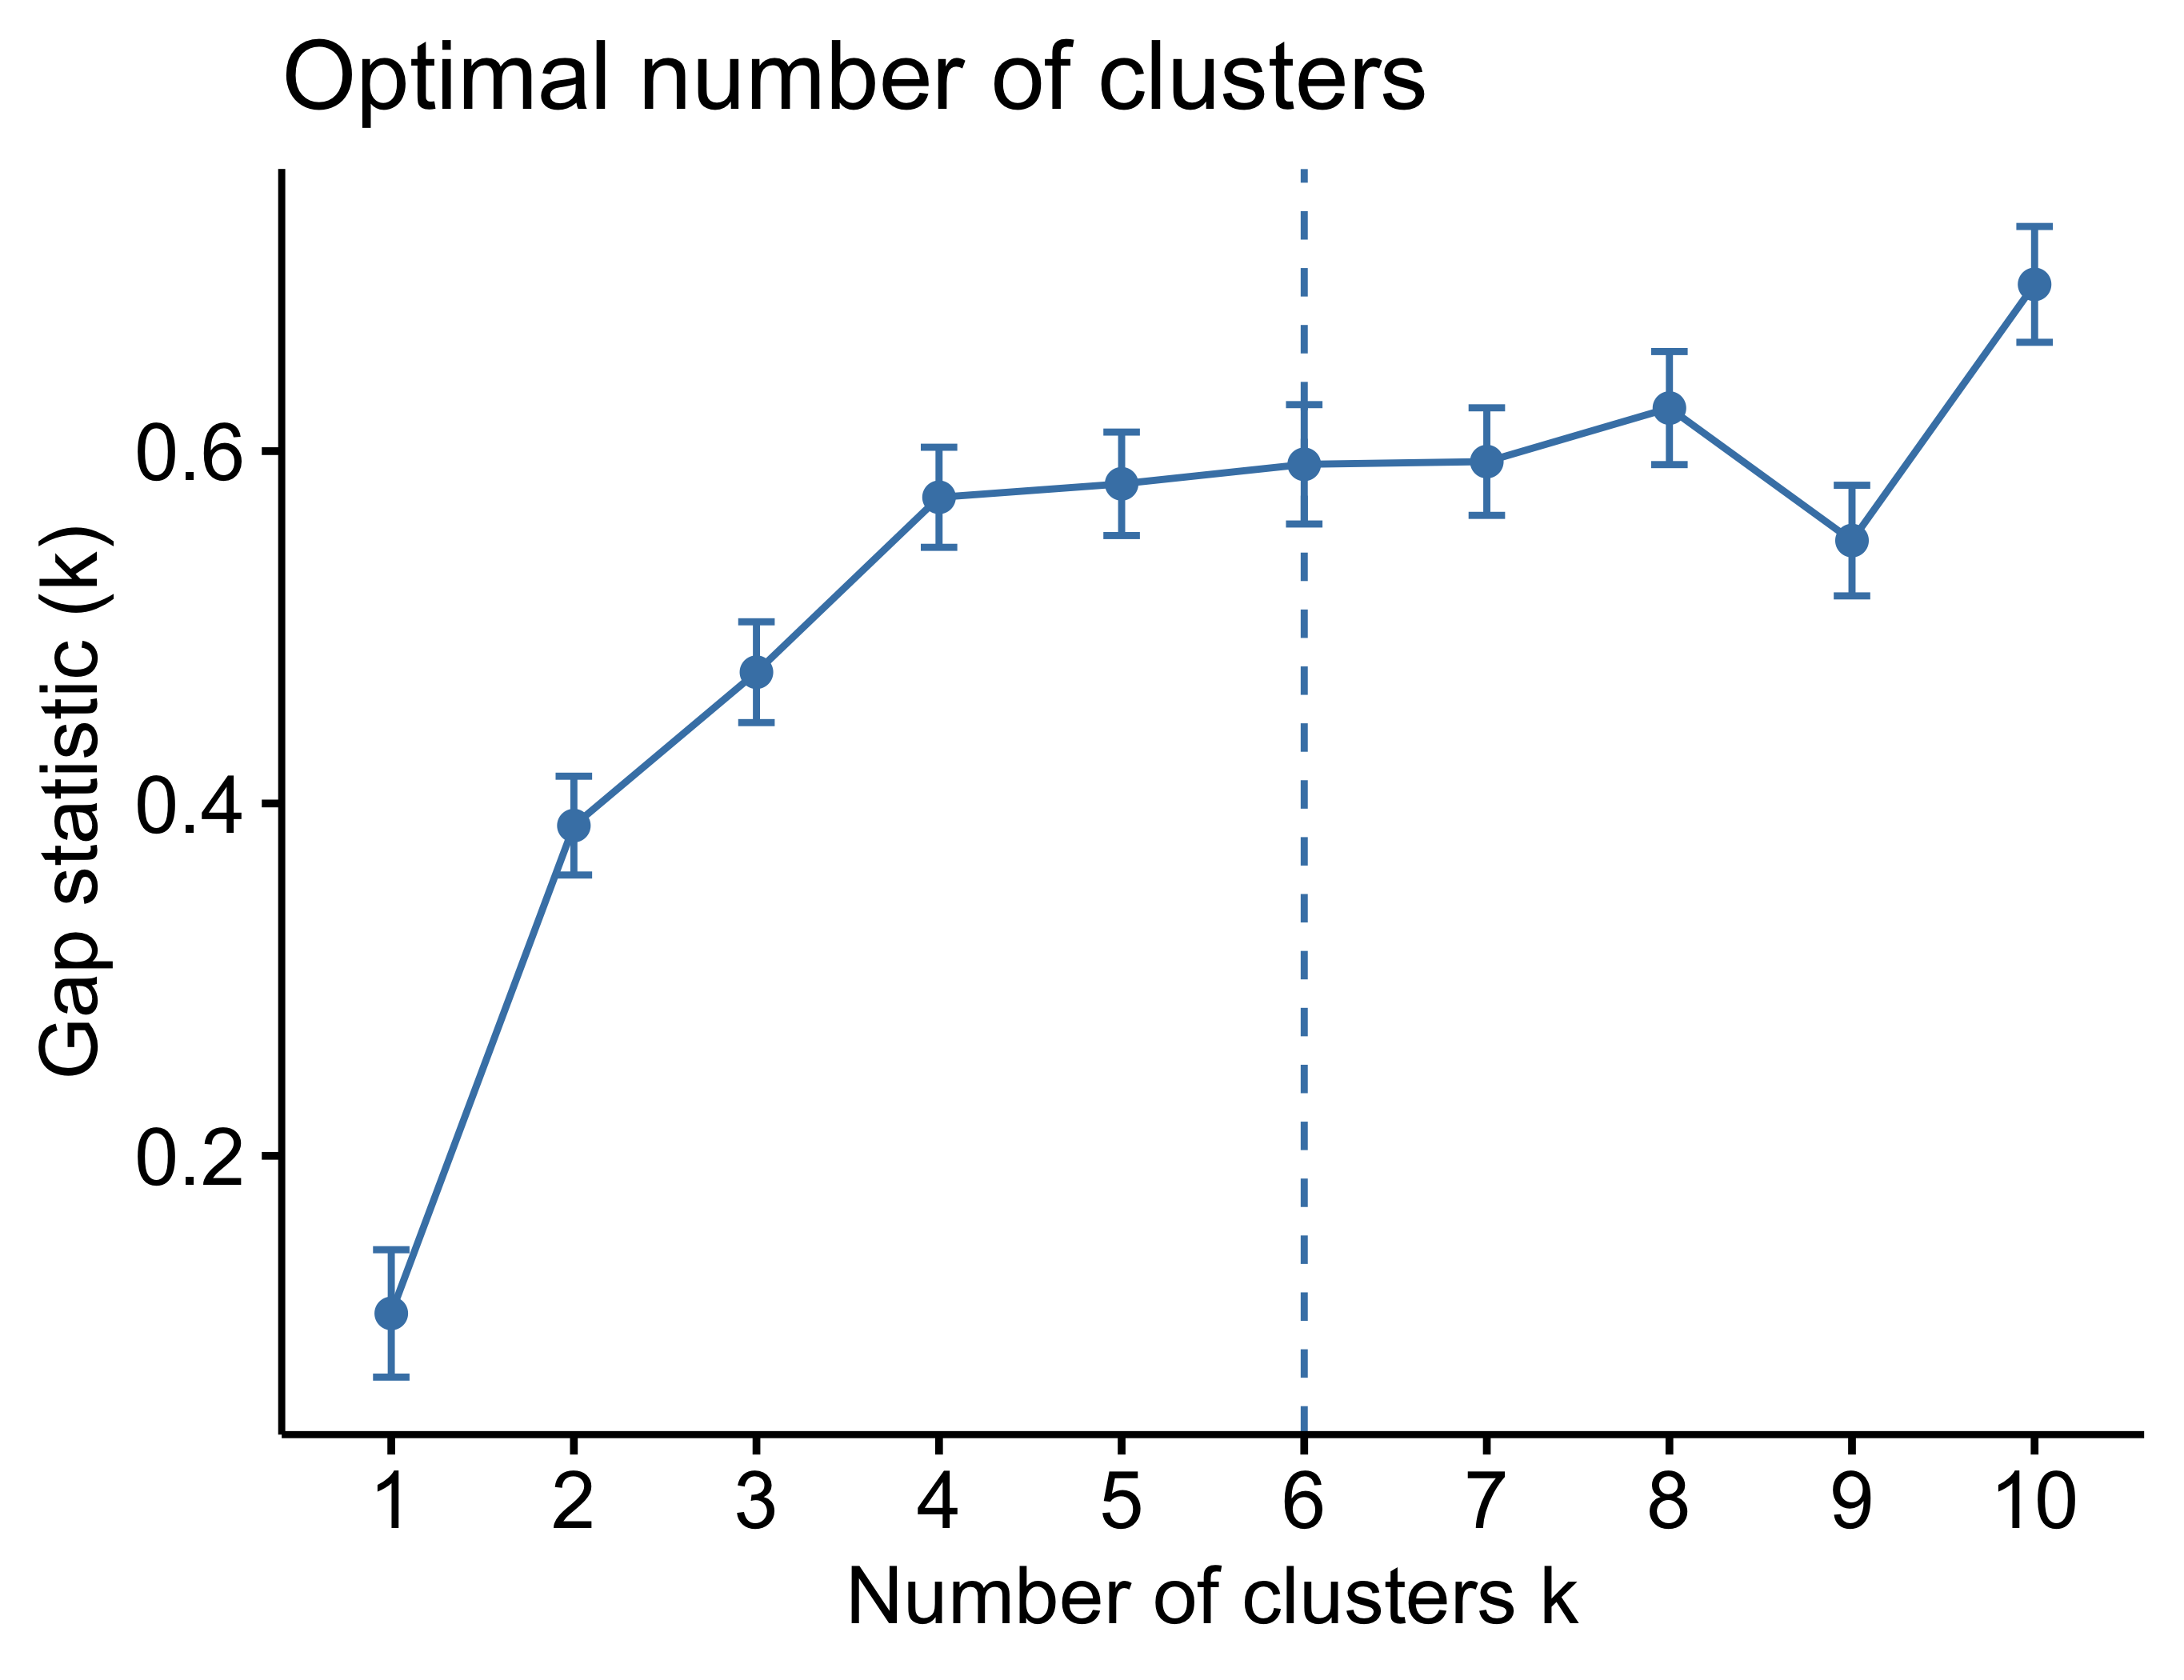

In [6]:
my_data <- scale(df_dist_buyers)
fviz_nbclust(my_data, kmeans, method = "gap_stat")

In [7]:
# out.width =600
# out.height=600

In [9]:

hc <- hclust(df_dist_buyers, method='ward.D2')

pdf('../figures/dendrogram_buyers.pdf',width=9.1/2,height=7/2)
p <- fviz_dend(hc, cex = 0.8, k=6, k_colors = c('#32A251', '#FF7F0F', '#3CB7CC', 
                                                '#fec44f',  '#B85A0D', '#39737C'), 
               type = 'circular', repel = TRUE)
print(p)
dev.off()

pdf 
  2

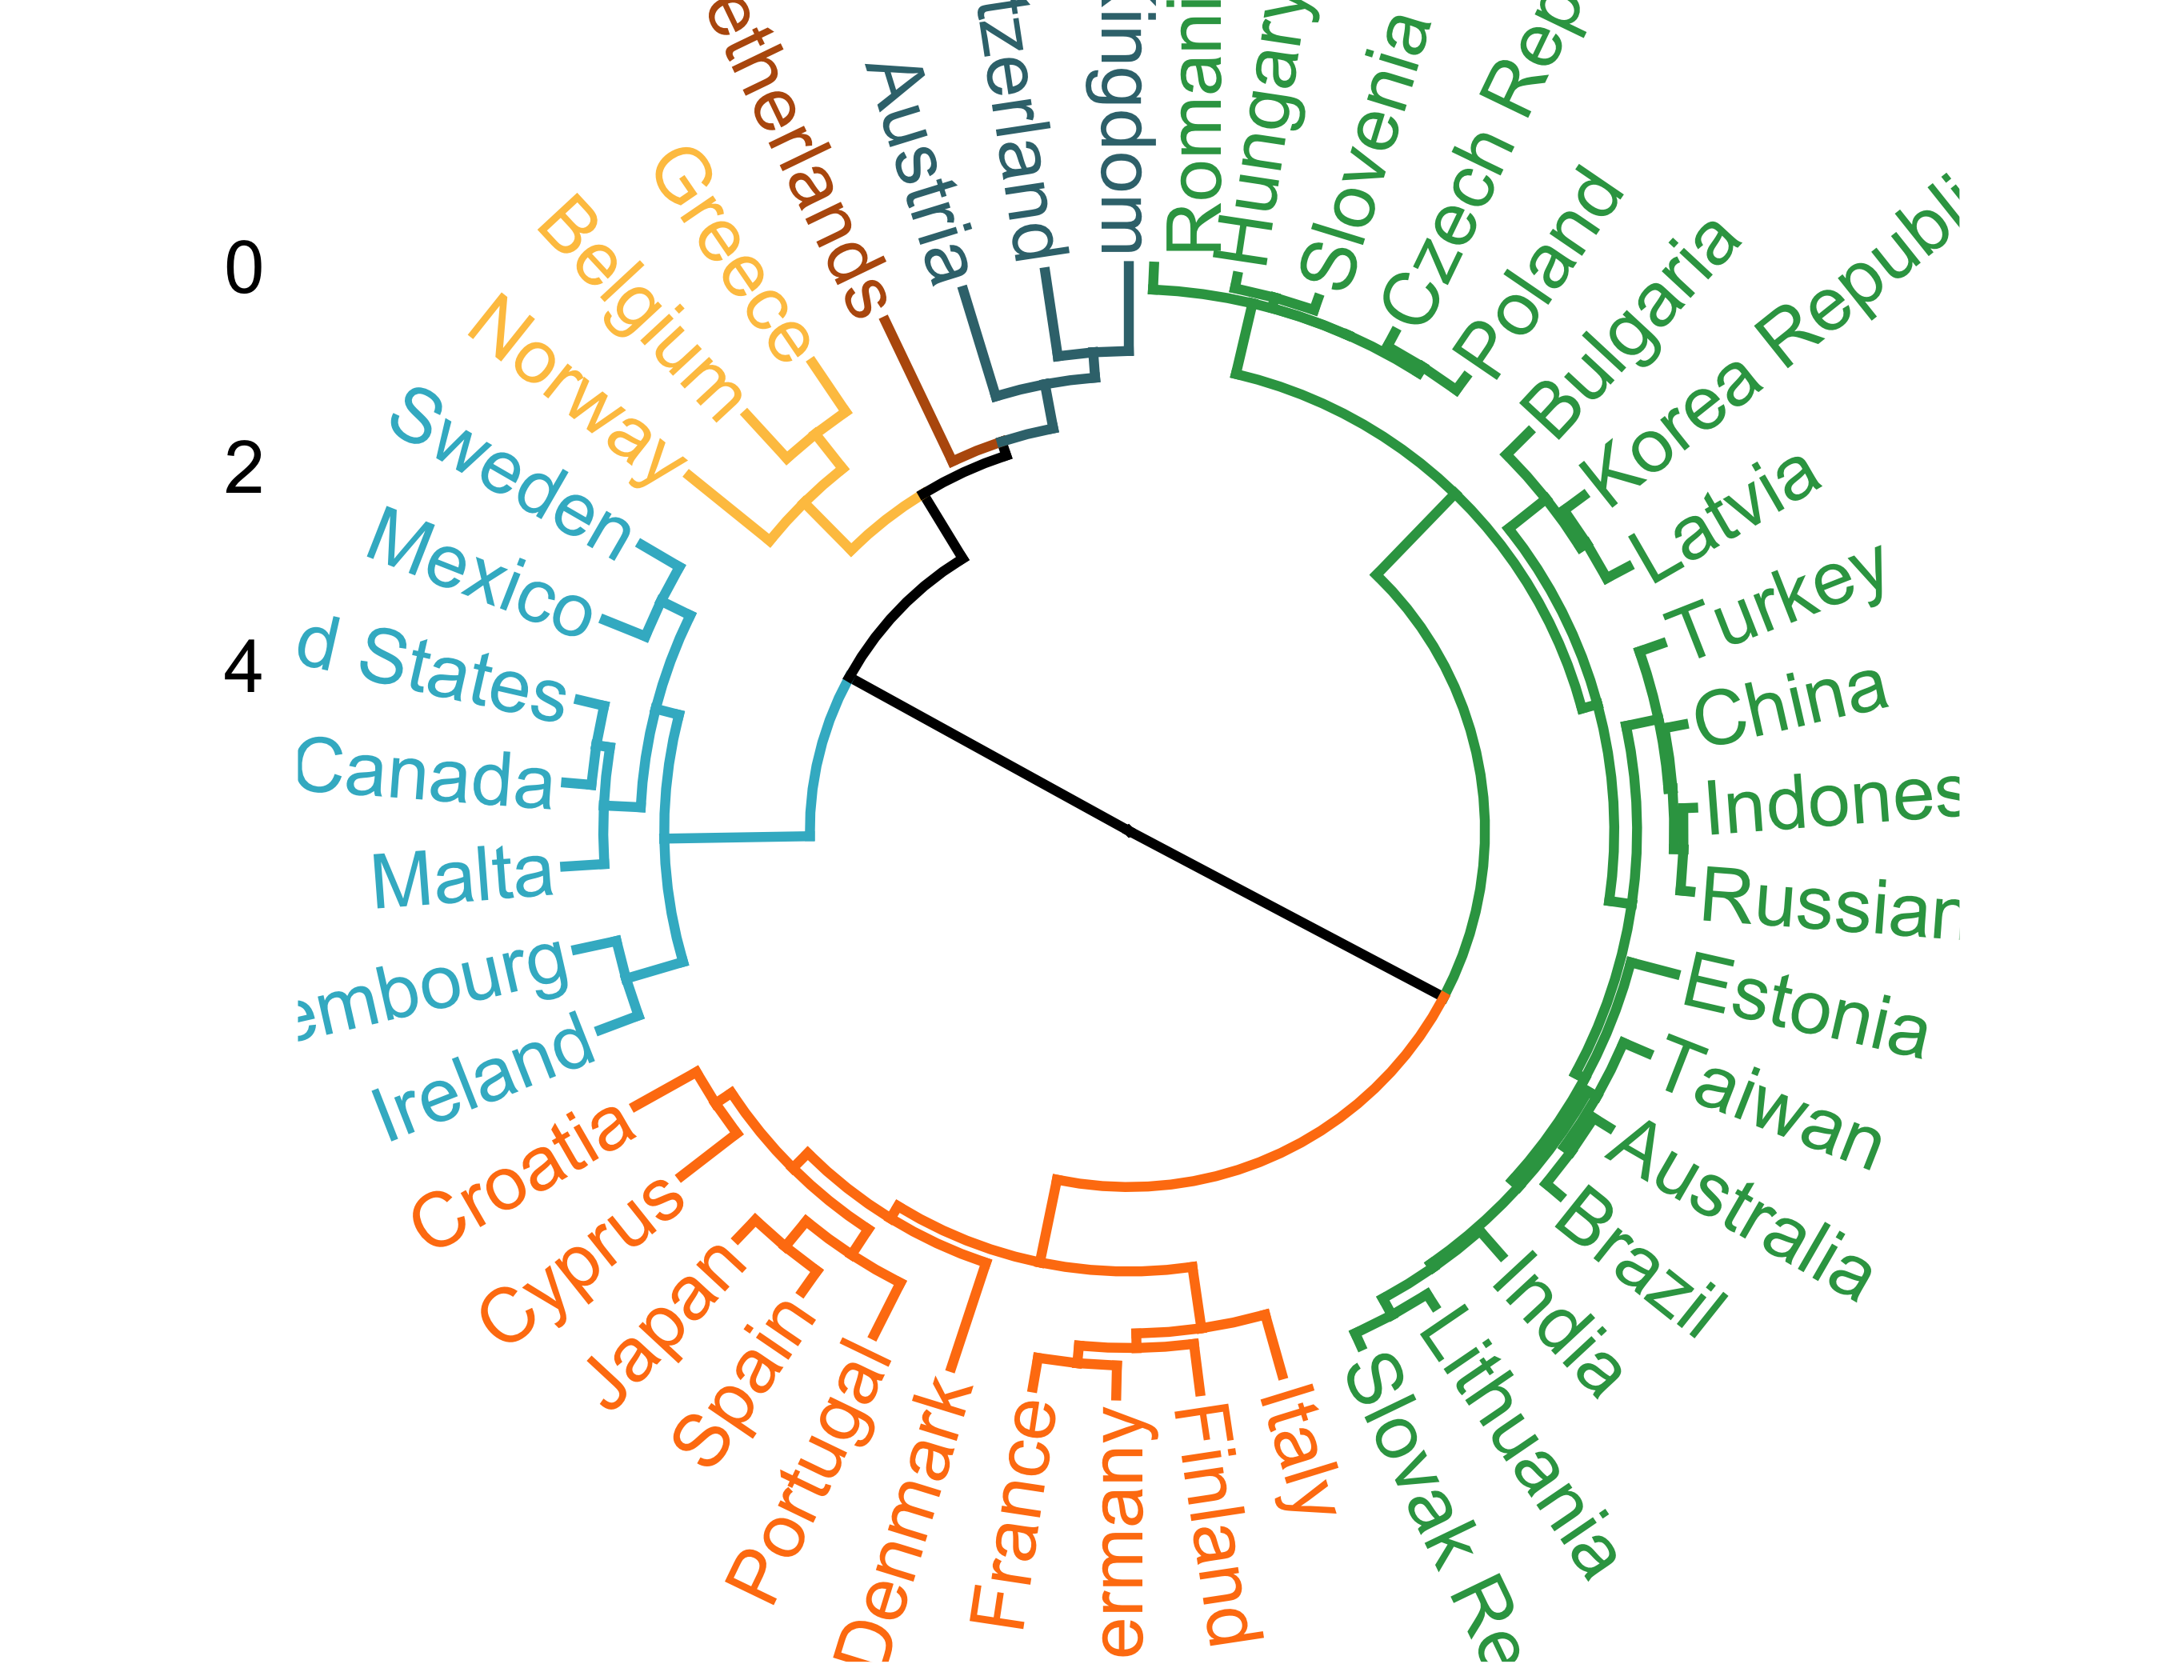

In [16]:
fviz_dend(hc, cex =  0.8, k=6, k_colors = c('#32A251', '#FF7F0F', '#3CB7CC',
                                            '#fec44f', '#B85A0D', '#39737C'),
          type = 'circular', repel = TRUE)


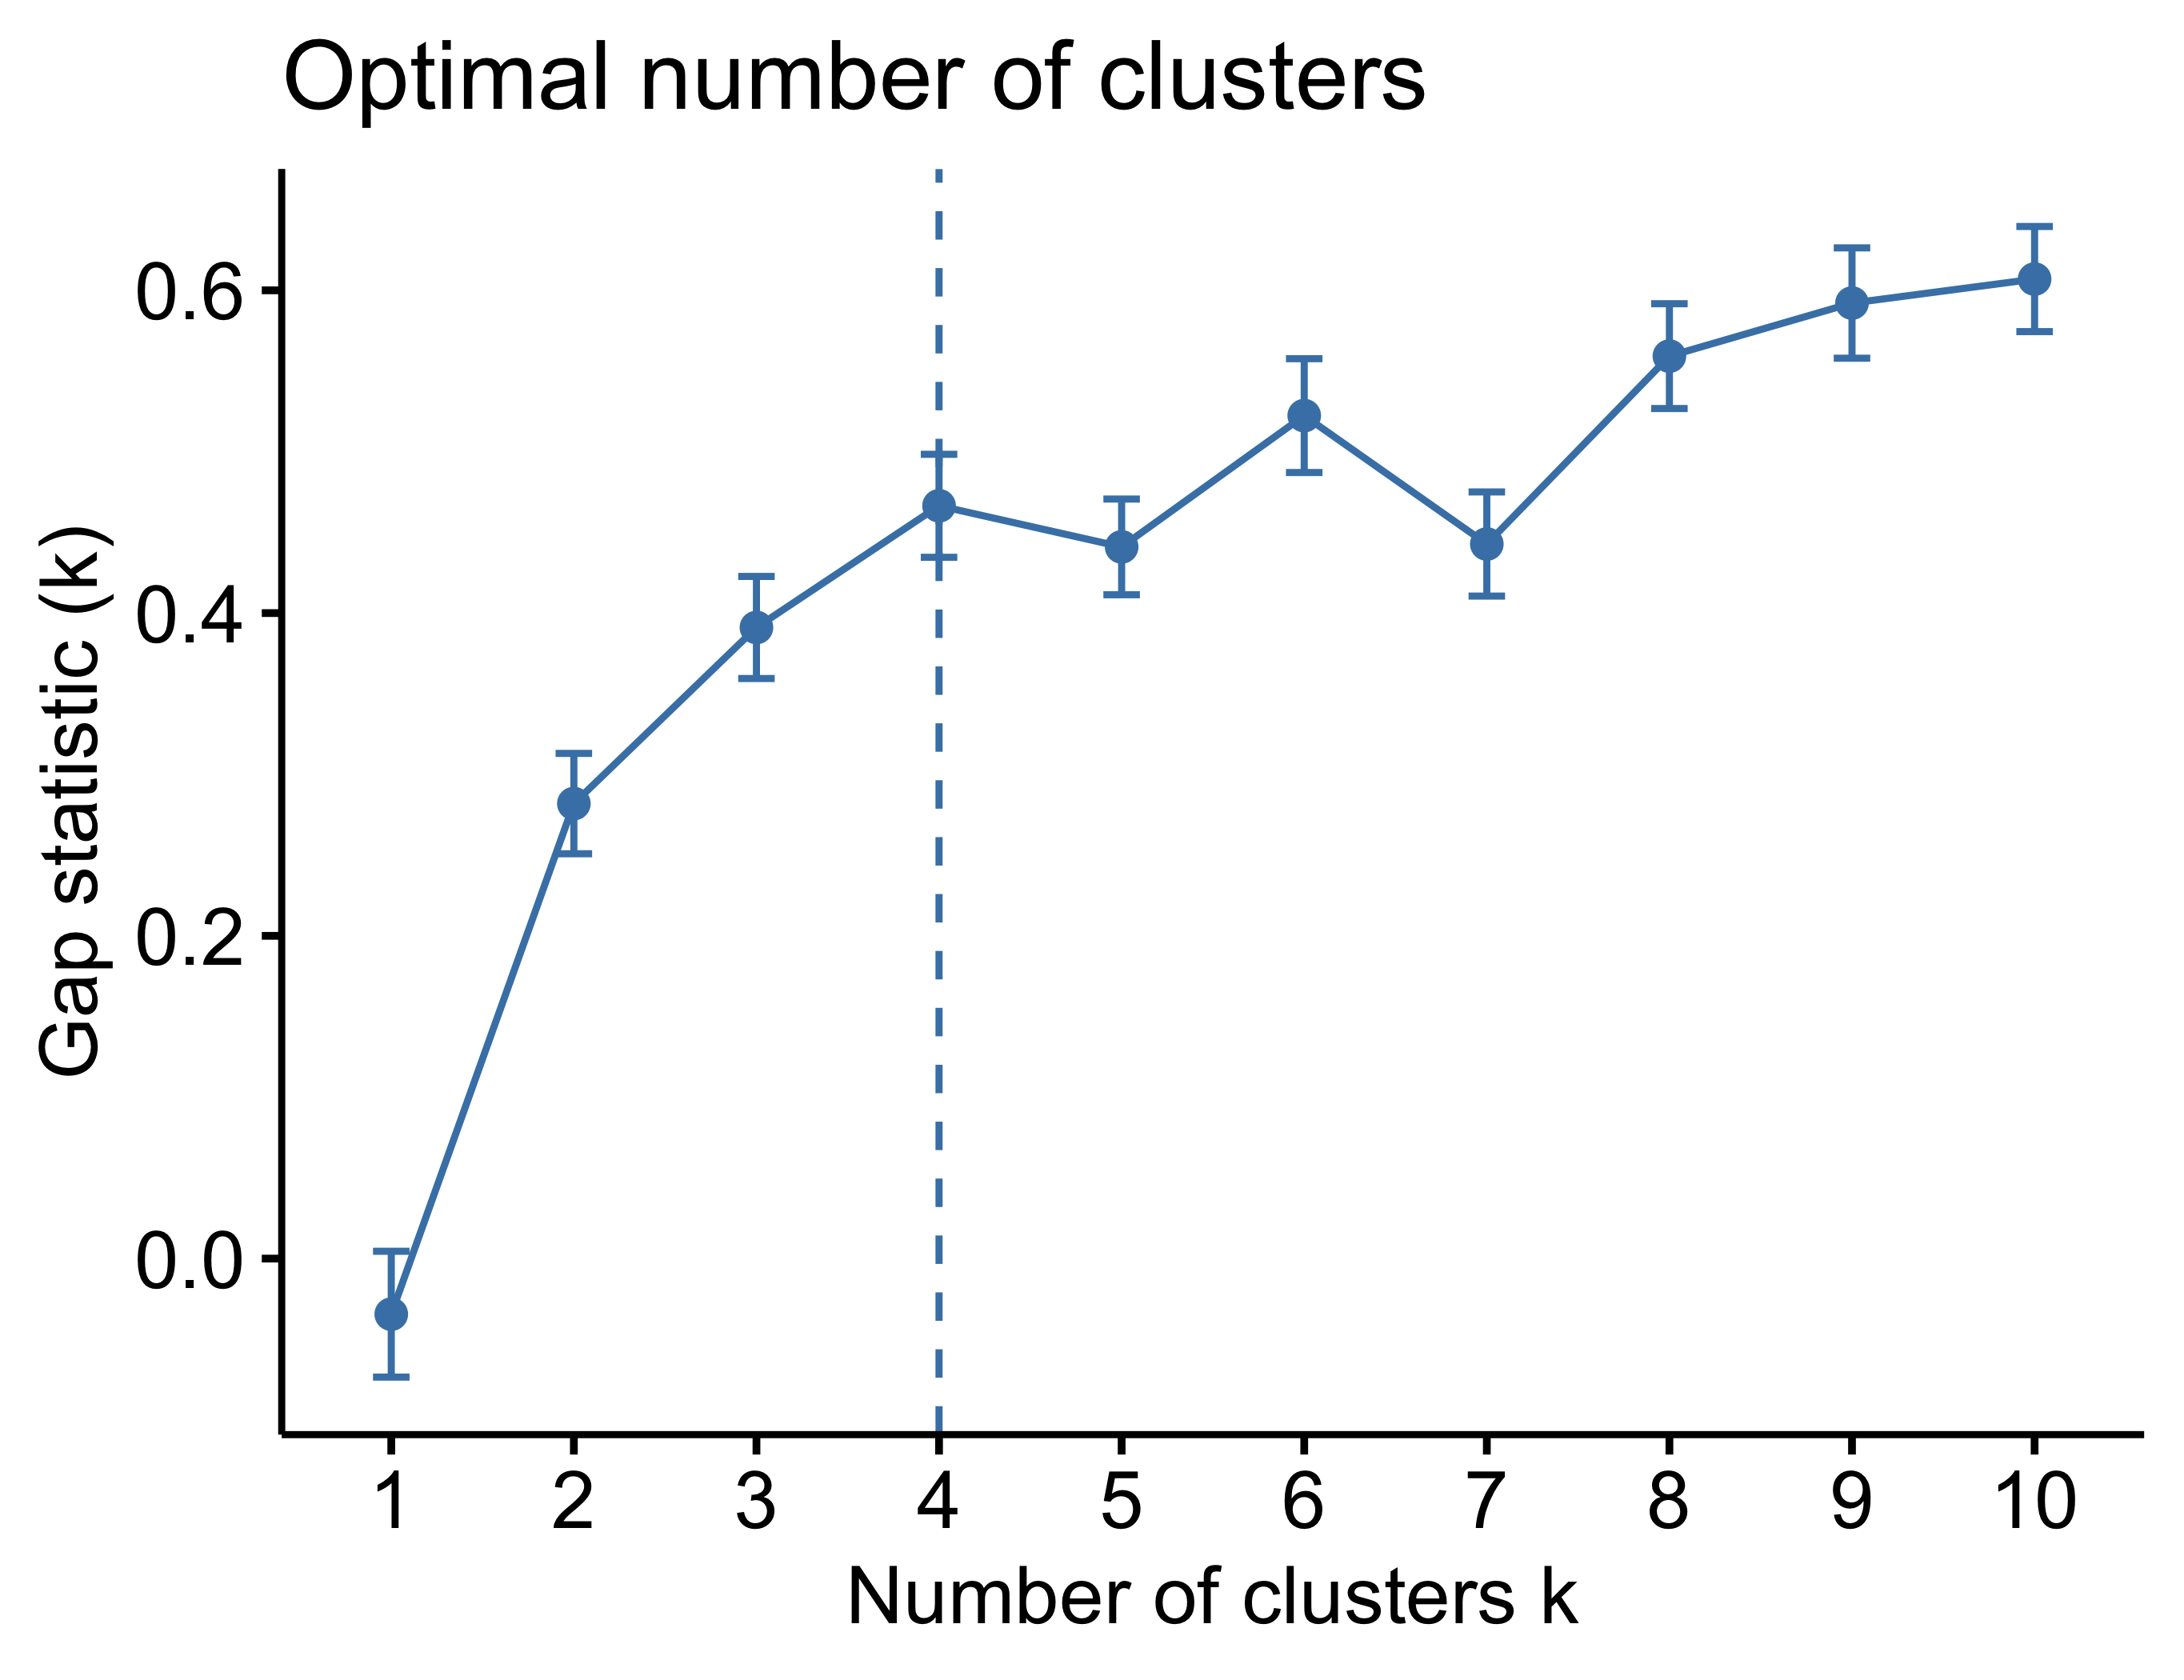

In [22]:
my_data <- scale(df_dist_sellers)
fviz_nbclust(my_data, kmeans, method = "gap_stat",)

In [18]:
hc <- hclust(df_dist_sellers, method='ward.D2')

pdf('../figures/dendrogram_sellers.pdf',width=9.1/2,height=7/2)
# par(mar=c(10,3,3,10)) # mar=c(bottom, left, top, and right).
p <- fviz_dend(hc, cex = 0.8, k=4, k_colors = c('#32A251', '#FF7F0F', '#3CB7CC', 
                                                '#fec44f'),                type = 'circular', repel = TRUE)
print(p)
dev.off()


pdf 
  2

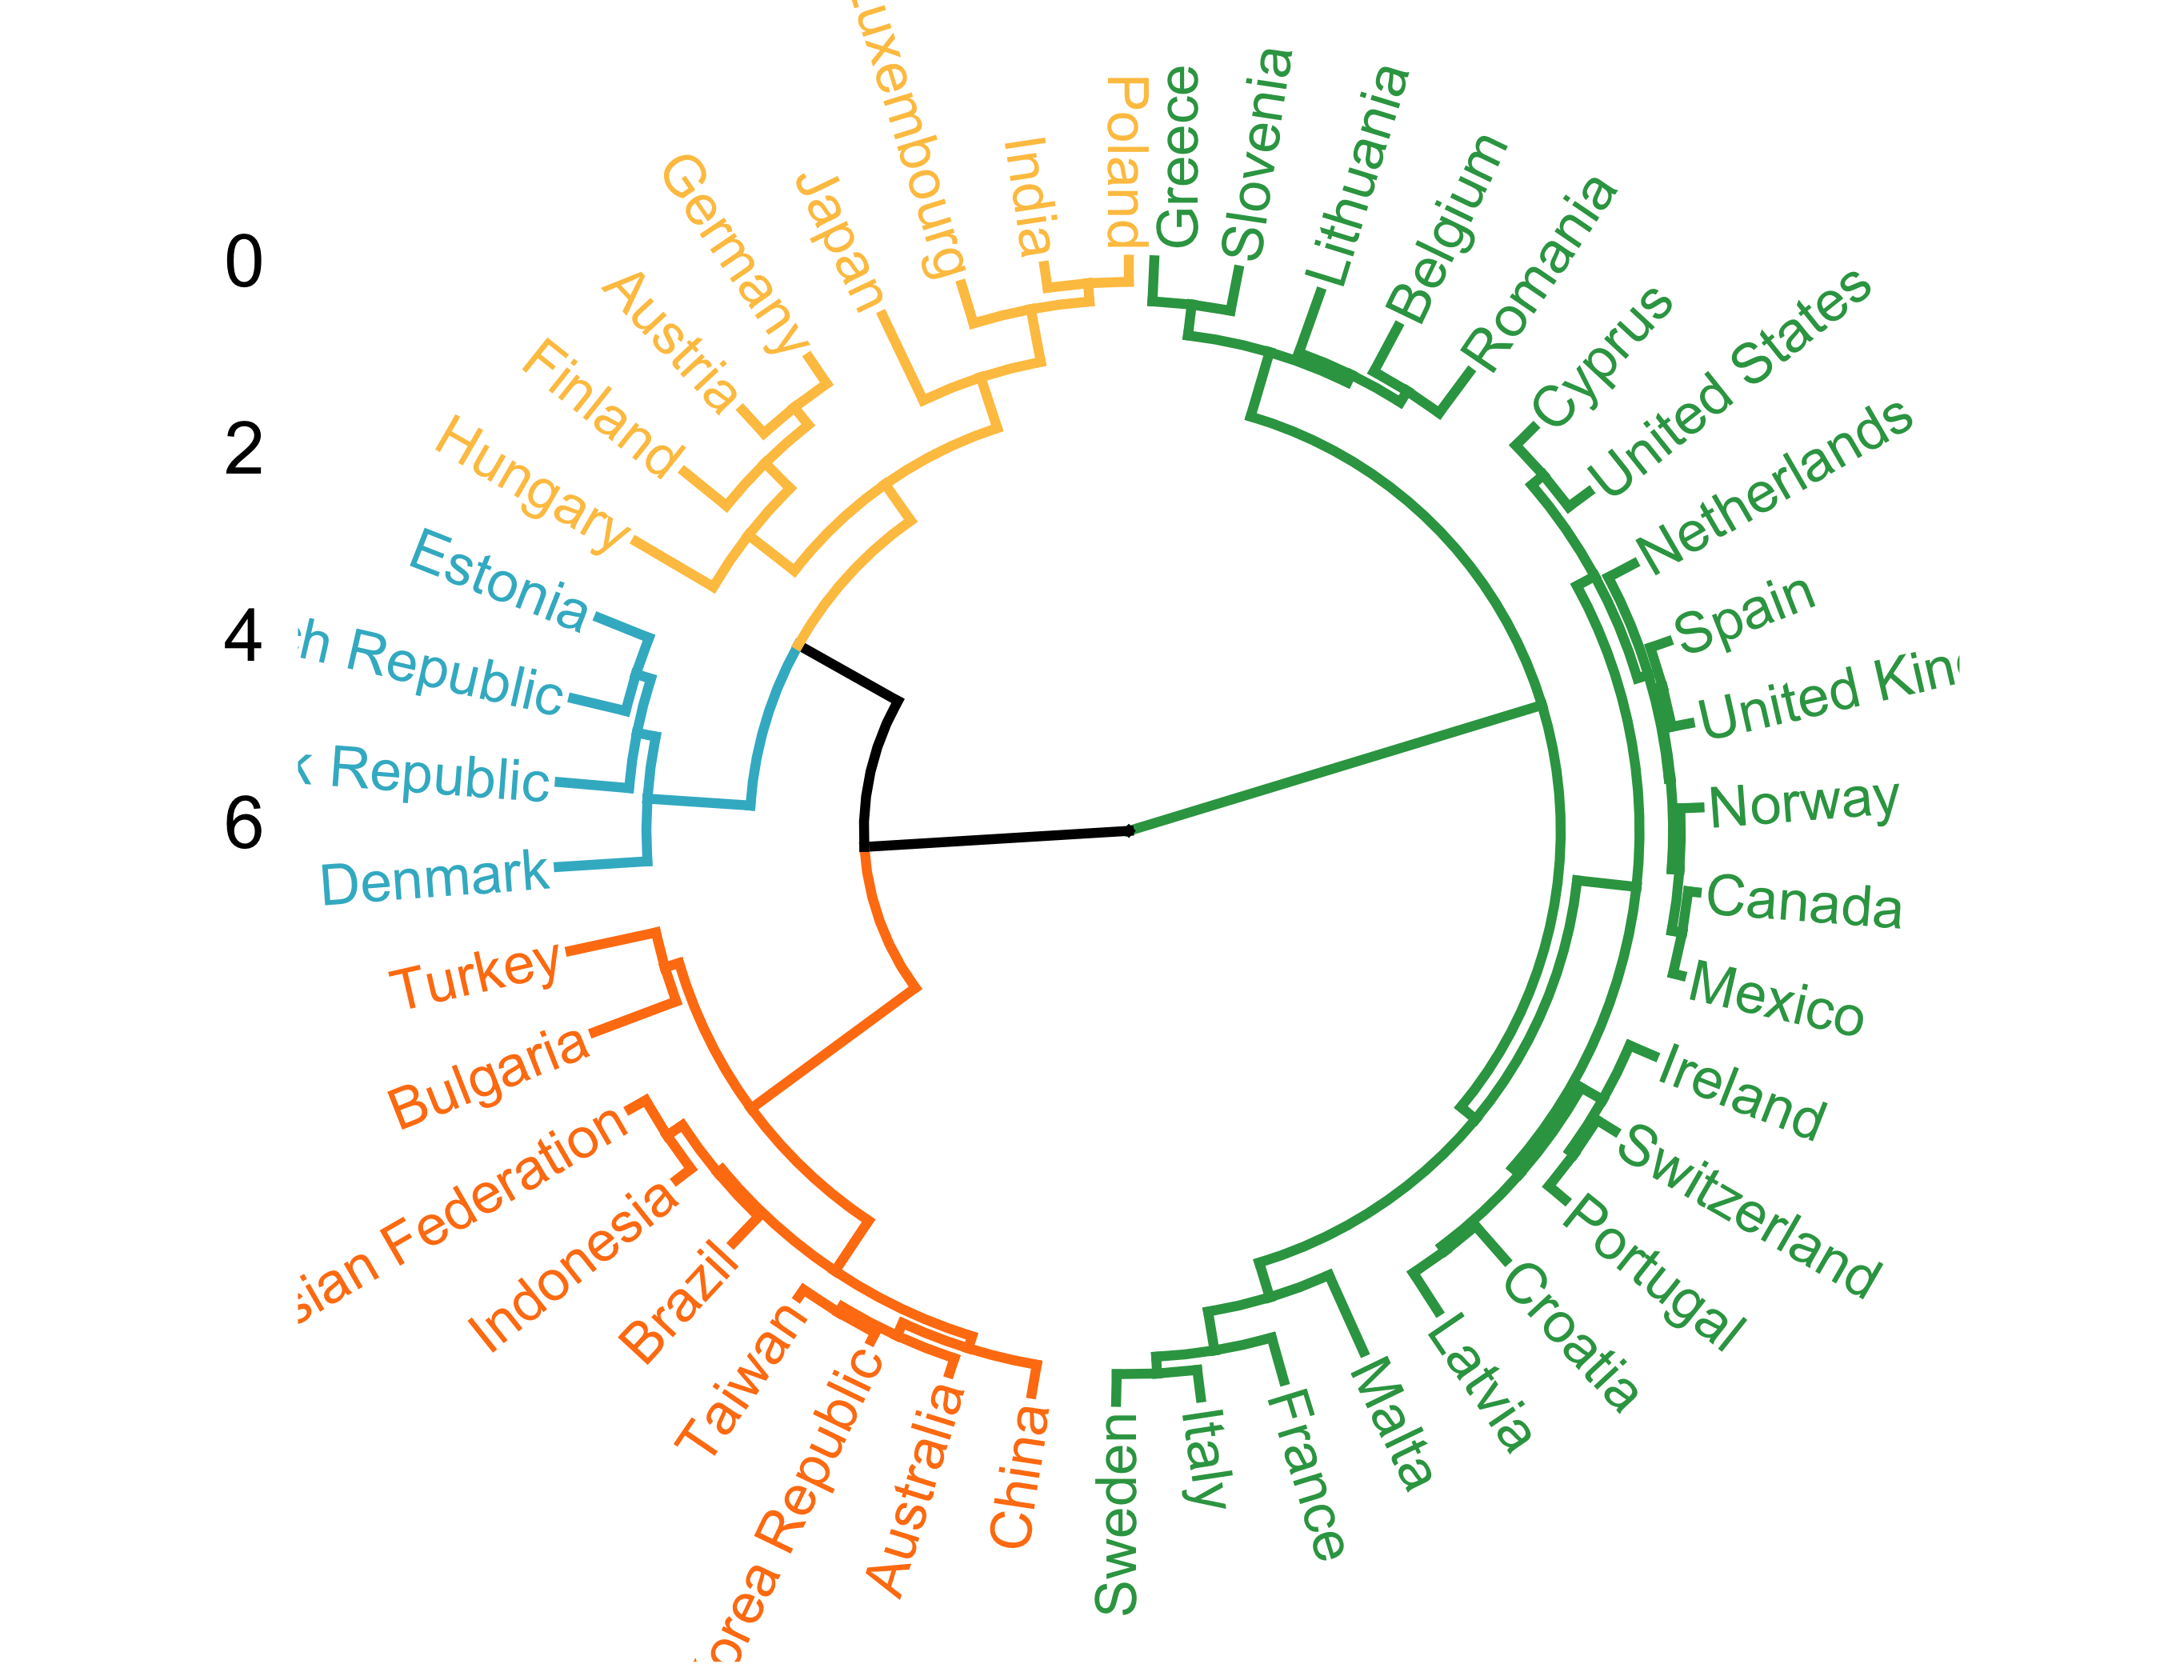

In [33]:
fviz_dend(hc, cex = 0.6, k=4, k_colors = c('#32A251', '#FF7F0F', '#3CB7CC','#fec44f'),
          type = 'circular',rect_border=1:10, repel = TRUE)
